<tr>
<td align="center">
 <div align="center">
   <font color="#21618C" size=8px>
   <b>The Sparks Foundation</b>
 <div align="center">       
   <font color="#21618C" size=5px>
   <b>Graduation Rotation Internship Program</b>
<td width="30%" align="center" > <img src="images.png"> 

<table align="left" style="margin-left: 60px;">
<td>
<font color="green" size=6px >            
<b>Data Science and Business Analytics</b>

## Supervised Learning - Prediction of student percentage
* ##### [1. Introduction to supervised learning](#introduction)
* ##### [2. Simple Linear Regression](#SLR)
* ##### [3. Problem Statement](#problem_statement)
* ##### [4. Dataset Description](#description)
* ##### [5. Data Dictionary](#dictionary)
* ##### [6. Prerequisite](#prerequisite)
* ##### [7. Understanding and summarizing dataset](#understanding)
* ##### [8. Exploratory Data Analysis](#EDA)
* ##### [9. Data preparation](#preparation)
* ##### [10. Model developement](#model_developement)
* ##### [11. Evaluate the model](#evaluation)
* ##### [12. Prediction](#prediction)
* ##### [13. Conclusion](#conclusion)

<a id="introduction"><a>
## Introduction to Supervised Learning
Supervised learning is a type of machine learning algorithm in which the model is trained using labeled data. In supervised learning, the algorithm is provided with input data and corresponding output data (also known as labels), and the goal is to learn a function that maps the input to the output.
Supervised learning is commonly used for tasks such as classification and regression. In classification tasks, the goal is to predict a categorical output, while in regression tasks, the goal is to predict a continuous output.
Here, we are going to use Simple Linear Regression which is a regresssion model to predict the target variable.

<a id="SLR"><a>
## Simple Linear Regression
Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the independent variable(s) and the dependent variable, and seeks to find the line of best fit that represents this relationship.
In simple linear regression, there is only one independent variable

<a id="problem_statement"><a>
## Problem Statement

The goal of this study is to investigate the relationship between the number of hours a student studies and their exam score. The objective is to develop a simple linear regression model that can accurately predict a student's score on an exam based on the number of hours they studied. This model can be used by educators and students to identify the optimal amount of time needed to study in order to achieve a desired score.

<a id="description"><a>
## Dataset Description

The dataset for predicting student score based on the number of hours of study using simple linear regression consists of two columns. The first column represents the independent variable, which is the number of hours a student studies. 
The second column represents the dependent variable, which is the student's score on an exam. The dataset includes multiple rows of data, each row containing a pair of values representing the number of hours studied and the corresponding score.

<a id="dictionary"><a>
## Data Dictionary

**Hours** : This column represents the amount of time a student spends studying, measured in hours. 

**Scores** : This column represents the score of the student on an exam. The score is measured using a numerical scale, and may range from 0 to 100.

<a id="prerequisite"><a>
## Prerequisite

### Import libraries

In [1]:
# Import pandas for storing , retrieving and manipulating 2-dimensional data in the form of table
import pandas as pd
# Import matplotlib for visualization tools
import matplotlib.pyplot as plt
# Import seaborn for better visualization methods
import seaborn as sns
# Import train_test_split function to split dataset to test and train dataset
from sklearn.model_selection import train_test_split
# Import LinearRegression to develope a prediction model
from sklearn.linear_model import LinearRegression
# Import metrics to evaluate model
from sklearn import metrics
# Import warnings
import warnings
# Ignore warnings during code execution
warnings.filterwarnings("ignore")

### Import dataset 

In [2]:
# Import the given dataset into a dataframe
data = pd.read_csv("http://bit.ly/w-data")

<a id="understanding"><a>
## Understanding and summarizing dataset

In [3]:
# Check the length of the dataset
len(data)

25

In [4]:
# Get the first five observations of the dataframe
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
# Get statistical data of the dataset which includes 5-point summary 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Check if null values are present in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<a id="EDA"><a>
## Exploratory Data Analysis 

### Univariate Analysis

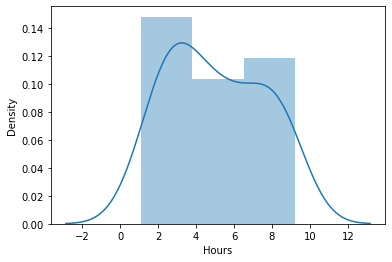

In [7]:
# Plot a histogram of hours 
sns.distplot(data.Hours)
# Display the plot
plt.show()

* The distribution shape is nearly a bimodal and have negligible skewness.

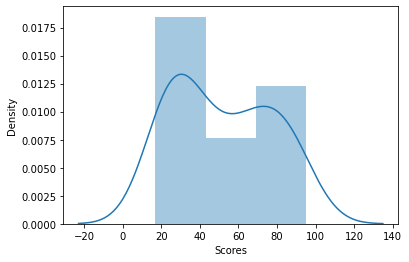

In [8]:
# Plot a histogram of Scores 
sns.distplot(data.Scores)
# Display the plot
plt.show()

* The distribution is clearly a bimodal and have negligible skewness.

### Bivariate Analysis

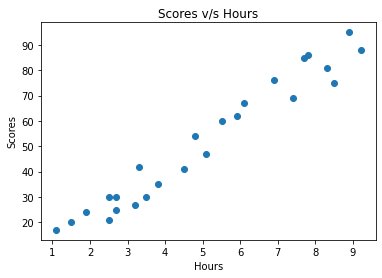

In [9]:
# Plot a scatter plot for scores v/s hours
plt.scatter(data.Hours,data.Scores)
# Set title for the plot
plt.title("Scores v/s Hours")
# Set x-axis label for the plot
plt.xlabel("Hours")
# Set y-axis label for the plot
plt.ylabel("Scores")
# Display the plot
plt.show()

* It is conclusive that hours and scores have positive correlation.
* Also, the dataset doesn't seems to have any outliers.

In [10]:
# Print the correlation between scores and hours
print("Correlation between Scores and Hours : " , data.corr().loc["Hours","Scores"])

Correlation between Scores and Hours :  0.9761906560220883


* The correlation value shows that scores value is highly dependent on hours value

<a id="preparation"><a>
## Data Preparation

In [11]:
# Store independent variable in X 
X = data[["Hours"]].values
# Store target variable in y
y = data[["Scores"]].values

In [12]:
# Split the dataset into train data and test data for both independent and target variable
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=10)

<a id="model_developement"><a>
## Model Developement

In [13]:
# Initialize Linear Regression model
model = LinearRegression()

# Train the model using train data
model.fit(X_train,y_train)

LinearRegression()

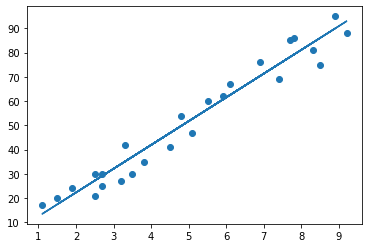

In [14]:
# Find the regression line
line = model.coef_*X + model.intercept_

# Plot a scatter plot for Scores v/s Hours
plt.scatter(X, y)
# Plot a linear regression line
plt.plot(X, line)
# Display the plot
plt.show()

<a id="evaluation"><a>
## Evaluate Model

In [15]:
# Predict the target variable for test data
y_pred = model.predict(X_test)
# Display the predicted values
y_pred

array([[17.37142335],
       [52.70292295],
       [35.03717315],
       [34.05574261],
       [46.81433968]])

In [16]:
# Display results of predicted values and actual values
pd.DataFrame({"Predicted":y_pred.reshape(5),"Actual":y_test.reshape(5)})

,Predicted,Actual
0,17.371423,20
1,52.702923,47
2,35.037173,42
3,34.055743,27
4,46.814340,41


In [27]:
# Evaluate the model through various metricsr
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error :',metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error :',metrics.mean_squared_error(y_test, y_pred)**0.5) 
print('R-square :',metrics.r2_score(y_test, y_pred)) 

Mean Absolute Error : 5.632881746692995
Mean Squared Error : 34.300750550687425
Root Mean Squared Error : 5.856684262506168
R-square : 0.6683995499740194


<a id="prediction"><a>
## Prediction

* ### Predicted score if student studies 9.25 hrs/day

In [17]:
# Train the model with entire data as train data
model.fit(X,y)

# Predict the target variable for given independent variable
print("Predict score : " , round(model.predict([[9.25]])[0,0],2))

Predict score :  92.91


<a id="conclusion"><a>
## Conclusion

<p style='text-align: justify; text-indent: 30px;'>In conclusion, this supervised learning data science project aimed to predict student scores based on the number of hours they studied per day. The dataset was split into training and testing sets to develop and evaluate a model. The model was trained on the training data and its performance was evaluated using the test data.</p>
<p style='text-align: justify; text-indent: 30px;'>Furthermore, a model was developed using the entire dataset as training data to predict the score of a student who studies for 9.25 hours per day. This prediction could be useful for educators and policymakers to design and implement effective teaching strategies and policies that encourage students to devote more time to studying. </p>
<p style='text-align: justify; text-indent: 30px;'>This project demonstrates the use of supervised learning technique to make predictions based on historical data. This project could be extended to other domains, such as predicting sales based on advertising spend or predicting the likelihood of customer churn based on their behavior.</p>